In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data_cleaned.csv')
batter_df = pd.read_csv('updated final dataset/batters.csv')
matches_df = pd.read_csv('updated final dataset/matches.csv')
matches_summ_df = pd.read_csv('matches_summary.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6052\2107254774.py:1: DtypeWarning: Columns (28,29,30,31,43,46,47,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_cleaned.csv')


In [4]:
matches_df['venue'] = matches_df['venue'].replace({
    'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium, Chepauk',
    'MA Chidambaram Stadium': 'MA Chidambaram Stadium, Chepauk',
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium, Uppal',
    'Rajiv Gandhi International Stadium': 'Rajiv Gandhi International Stadium, Uppal',
    'Arun Jaitley Stadium': 'Arun Jaitley Stadium, Delhi',
    'Dr DY Patil Sports Academy': 'Dr DY Patil Sports Academy, Mumbai',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association Stadium, Mohali',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association Stadium, Mohali',
    'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association Stadium, Mohali',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
    'Brabourne Stadium': 'Brabourne Stadium, Mumbai',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium',
    'Maharaja Yadavindra Singh International Cricket Stadium, New Chandigarh': 'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur'
})

In [5]:
df.head()

,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,ball_no,batter,bat_pos,runs_batter,balls_faced,bowler,valid_ball,runs_extras,runs_total,runs_bowler,runs_not_boundary,extra_type,non_striker,non_striker_pos,wicket_kind,player_out,fielders,runs_target,review_batter,team_reviewed,review_decision,umpire,umpires_call,player_of_match,match_won_by,win_outcome,toss_winner,toss_decision,venue,city,day,month,year,season,gender,team_type,superover_winner,result_type,method,balls_per_over,overs,event_match_no,stage,match_number,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,131970,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,0.1,SC Ganguly,1,0,1,P Kumar,1,1,1,0,False,legbyes,BB McCullum,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,131971,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,0.2,BB McCullum,2,0,1,P Kumar,1,0,0,0,False,NaN,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,131972,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,0.3,BB McCullum,2,0,0,P Kumar,0,1,1,1,False,wides,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
3,131973,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,0.3,BB McCullum,2,0,1,P Kumar,1,0,0,0,False,NaN,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,3,0,NaN,0,2,0,"('BB McCullum', 'SC Ganguly')",NaN,False
4,131974,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,0.4,BB McCullum,2,0,1,P Kumar,1,0,0,0,False,NaN,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,4,0,NaN,0,3,0,"('BB McCullum', 'SC Ganguly')",NaN,False


In [6]:
matches_summ_df.head()

,match_id,team_a,team_b,runs_target,match_won_by,team_a_runs,team_b_runs,team_a_wickets,team_b_wickets
0,335982,Kolkata Knight Riders,Royal Challengers Bengaluru,223.0,Kolkata Knight Riders,222,82,3,10
1,335983,Chennai Super Kings,Punjab Kings,241.0,Chennai Super Kings,240,207,5,4
2,335984,Rajasthan Royals,Delhi Capitals,130.0,Delhi Capitals,129,132,8,1
3,335985,Mumbai Indians,Royal Challengers Bengaluru,166.0,Royal Challengers Bengaluru,165,166,6,5
4,335986,Sunrisers Hyderabad,Kolkata Knight Riders,111.0,Kolkata Knight Riders,110,112,10,5


Venue with most number of ipl matches

Text(0.5, 0, 'Frequency')

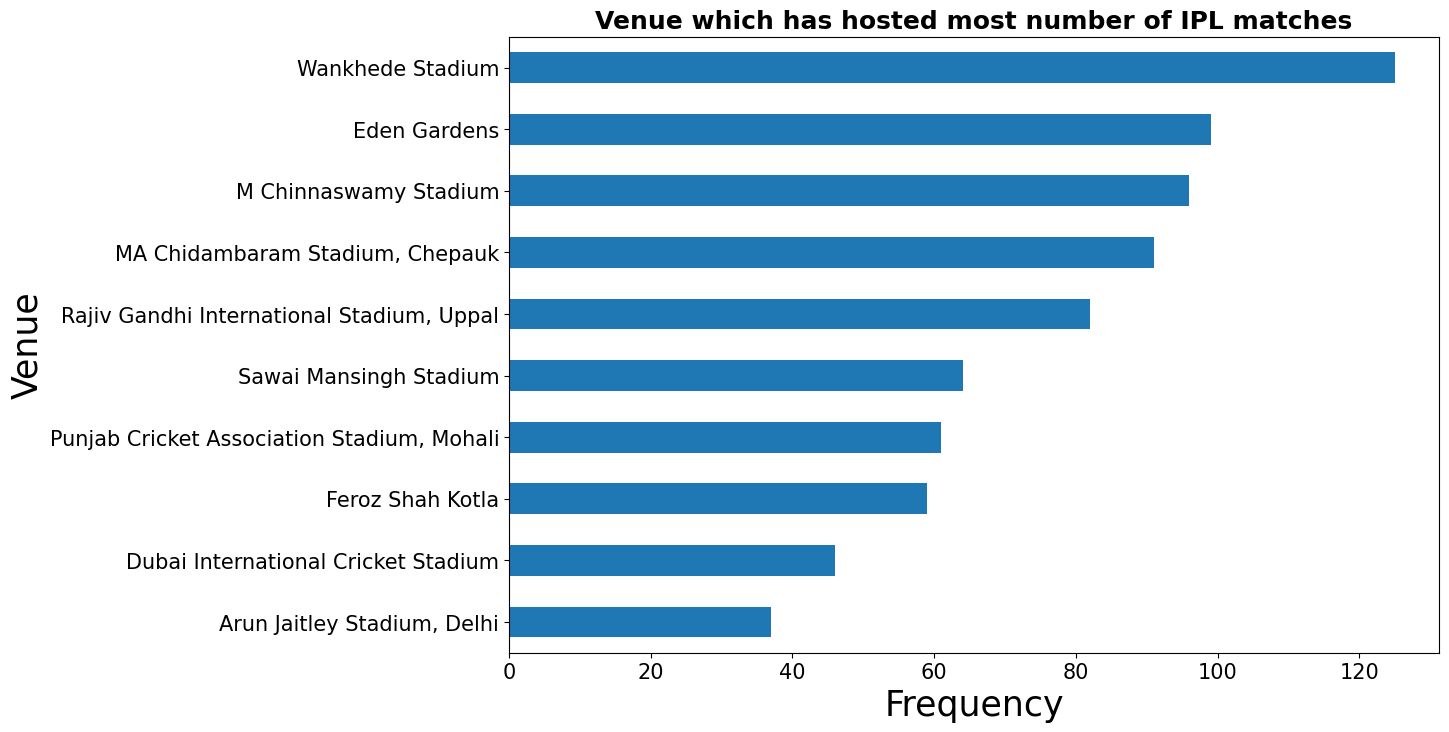

In [7]:
matches_df.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8), fontsize=15)
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 25)
plt.xlabel("Frequency", size = 25)

Teams with most number of wins

Text(0, 0.5, 'count')

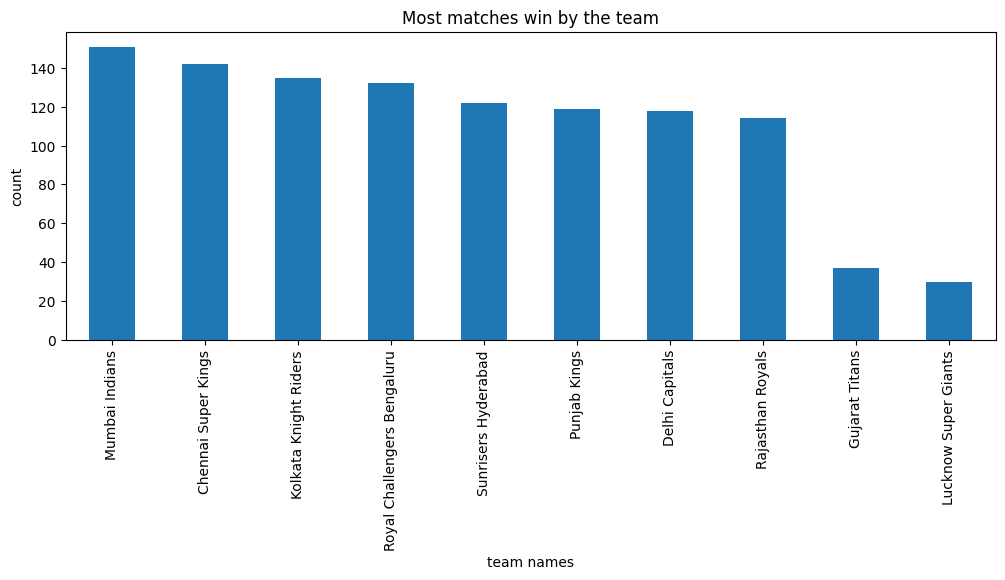

In [8]:
matches_summ_df['match_won_by'].value_counts().head(10).plot(kind='bar' , figsize=(12,4))
plt.title('Most matches win by the team')
plt.xlabel('team names')
plt.ylabel('count')

Most Number of Player of matche

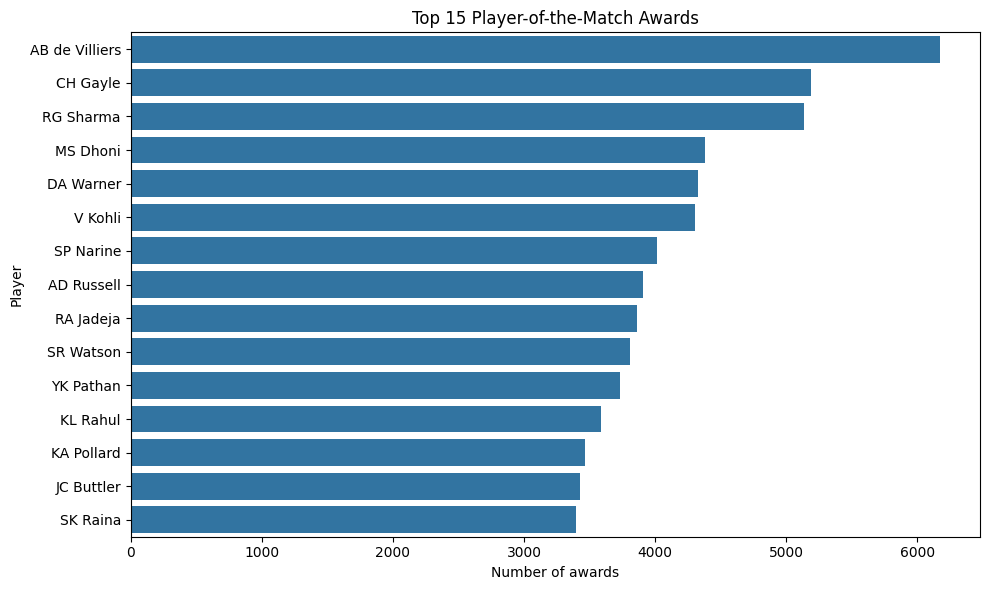

In [9]:
data_palyer_of_the_match = df['player_of_match'].value_counts().reset_index()
data_palyer_of_the_match.columns = ['player', 'count']
plot_players = data_palyer_of_the_match.sort_values('count', ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(data=plot_players, x='count', y='player')
plt.title('Top 15 Player-of-the-Match Awards')
plt.xlabel('Number of awards')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

Top 10 batters in IPL

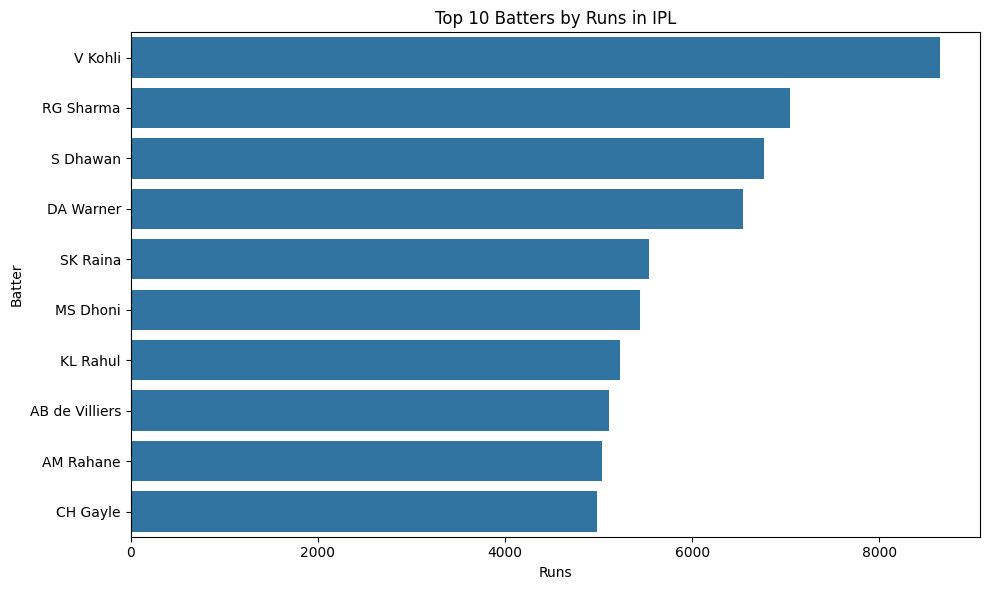

In [10]:
top_batters = batter_df.sort_values('runs_batter', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_batters, x='runs_batter', y='batter')
plt.title('Top 10 Batters by Runs in IPL')
plt.xlabel('Runs')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

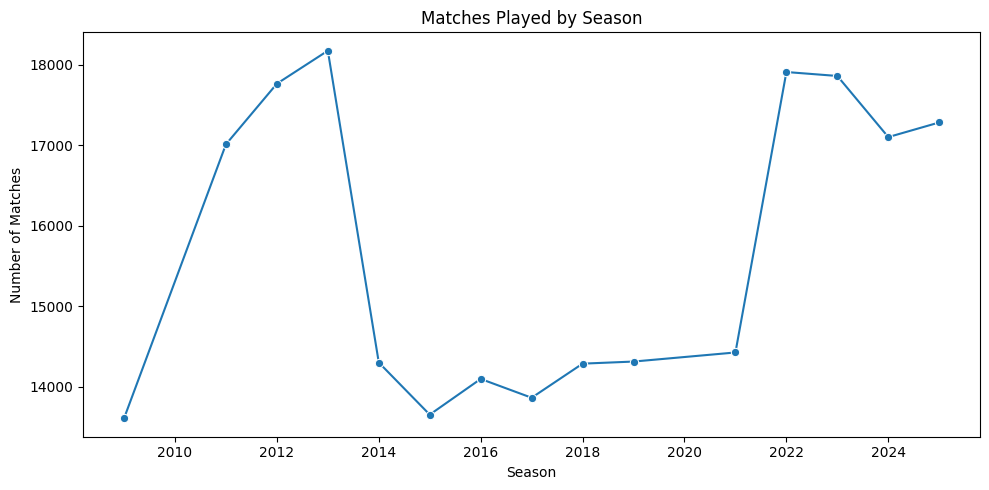

In [11]:
df['season'] = pd.to_numeric(df['season'], errors='coerce')
df = df[df['season'].notna()]
plt.figure(figsize=(10,5))
season_counts = df['season'].value_counts()
sns.lineplot(x=season_counts.index.astype(int), y=season_counts.values, marker='o')
plt.title('Matches Played by Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

Toss Decision

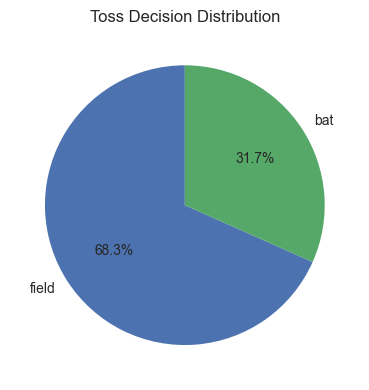

In [12]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(6,4))
df['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90 ,)
plt.title('Toss Decision Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

Does toss wins is equal to match winning ?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6052\2083645515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='toss_win_equals_match_win', data=df , palette='mako')


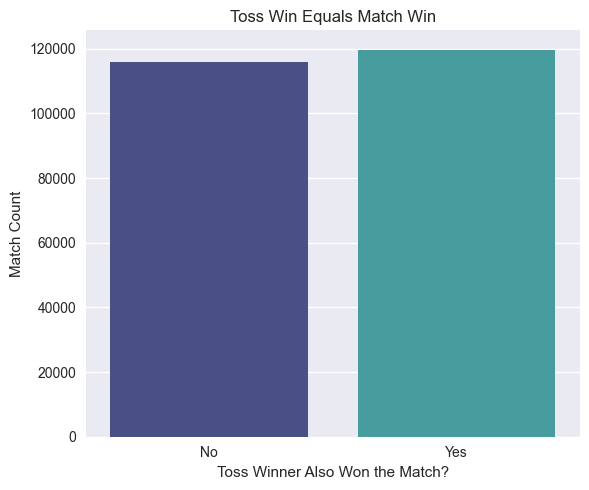

In [13]:
df['toss_win_equals_match_win'] = (df['toss_winner'] == df['match_won_by'])
plt.figure(figsize=(6,5))
sns.countplot(x='toss_win_equals_match_win', data=df , palette='mako')
plt.title('Toss Win Equals Match Win')
plt.xlabel('Toss Winner Also Won the Match?')
plt.ylabel('Match Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()

Team win most played finals

In [14]:
finals = matches_summ_df[matches_summ_df['stage'] == 'Final']
finals_appearances = pd.concat([finals['batting_team'], finals['bowling_team']]).value_counts().reset_index()
finals_appearances.columns = ['team', 'finals_played']
finals_appearances = finals_appearances.sort_values('finals_played', ascending=False)
finals_appearances
plt.figure(figsize=(10,6))
sns.barplot(data=finals_appearances, x='finals_played', y='team')
plt.title('Finals Appearances by Team')
plt.xlabel('Number of Finals')
plt.ylabel('Team')
plt.tight_layout()


KeyError: 'stage'

In [15]:
team_rename = {'Delhi Daredevils':'Delhi Capitals', 'Kings XI Punjab':'Punjab Kings', 'Royal Challengers Bangalore':'Royal Challengers Bengaluru'}
cols = ['batting_team', 'bowling_team', 'toss_winner', 'match_won_by']
df[cols] = df[cols].replace(team_rename)
dfunct_teams = ['Deccan Chargers', 'Gujarat Lions', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants', 'Pune Warriors']
df = df[~df['batting_team'].isin(dfunct_teams)]
df = df[~df['bowling_team'].isin(dfunct_teams)]

 Do teams bat first or second after winning toss?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Royal Challengers Bengaluru'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Deccan Chargers'),
  Text(5, 0, 'Punjab Kings'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Rajasthan Royals'),
  Text(8, 0, 'Pune Warriors'),
  Text(9, 0, 'Sunrisers Hyderabad'),
  Text(10, 0, 'Rising Pune Supergiants'),
  Text(11, 0, 'Rising Pune Supergiant'),
  Text(12, 0, 'Gujarat Titans'),
  Text(13, 0, 'Lucknow Super Giants')])

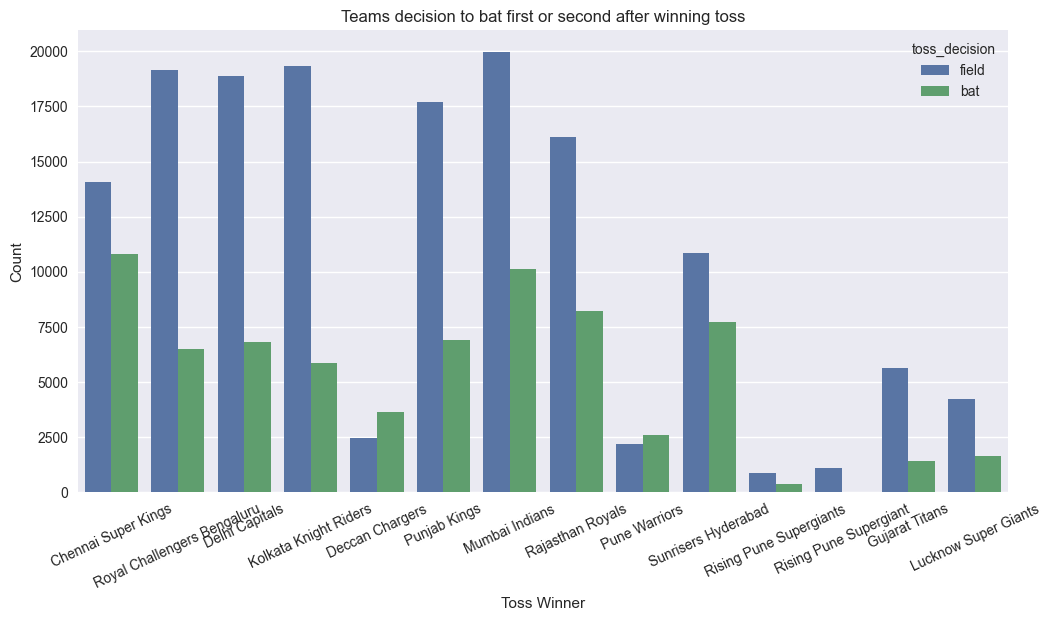

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner', data=df, hue='toss_decision')
plt.title("Teams decision to bat first or second after winning toss")
plt.xlabel("Toss Winner")
plt.ylabel("Count")
plt.xticks(rotation=25)


Powerplay vs Death Overs Analysis

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6052\1799615458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pp_sr.index, y=pp_sr.values, palette='coolwarm')


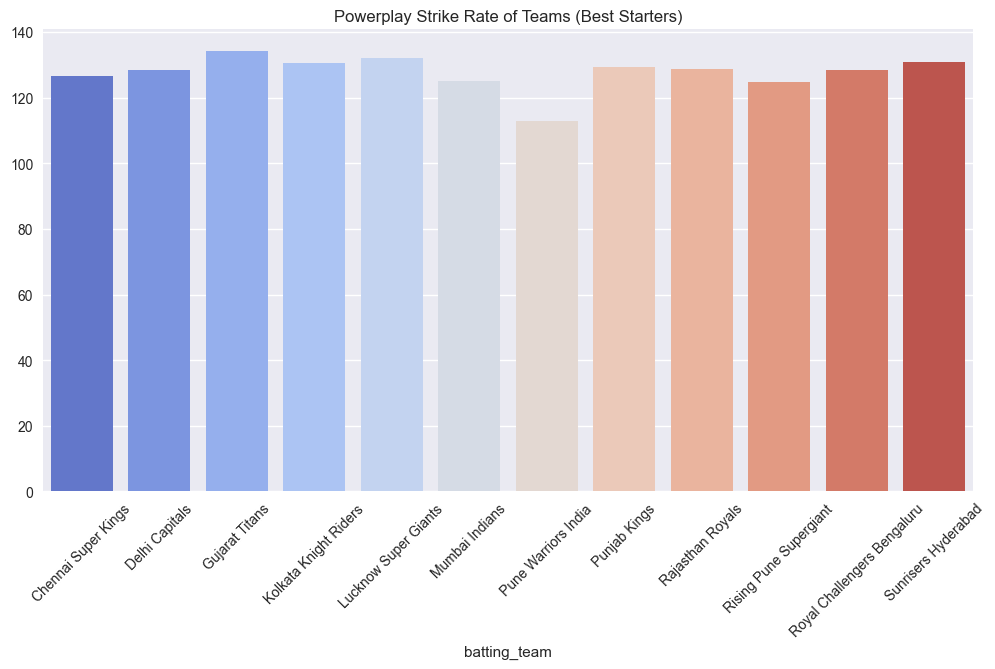

In [17]:
# Powerplay (Overs 0-5) Analysis
powerplay_data = df[df['over'] < 6]
pp_runs = powerplay_data.groupby('batting_team')['runs_total'].sum()
pp_balls = powerplay_data.groupby('batting_team')['ball'].count()
pp_sr = (pp_runs / pp_balls) * 100

# Visualize
plt.figure(figsize=(12,6))
sns.barplot(x=pp_sr.index, y=pp_sr.values, palette='coolwarm')
plt.title("Powerplay Strike Rate of Teams (Best Starters)")
plt.xticks(rotation=45)
plt.show()

Venue Bias (Chase vs Defend)

                                            Matches  Bat_1_Win  Chase_Win
venue                                                                    
Eden Gardens                                     77         30         47
Wankhede Stadium                                 73         35         38
M Chinnaswamy Stadium                            63         26         37
Feroz Shah Kotla                                 59         27         32
Wankhede Stadium, Mumbai                         52         21         31
Rajiv Gandhi International Stadium, Uppal        49         19         30
MA Chidambaram Stadium, Chepauk                  48         30         18
Sawai Mansingh Stadium                           47         15         32
Dubai International Cricket Stadium              46         21         25
Punjab Cricket Association Stadium, Mohali       35         15         20


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6052\2235791328.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  venue_stats = matches.groupby('venue').apply(


<Figure size 1200x600 with 0 Axes>

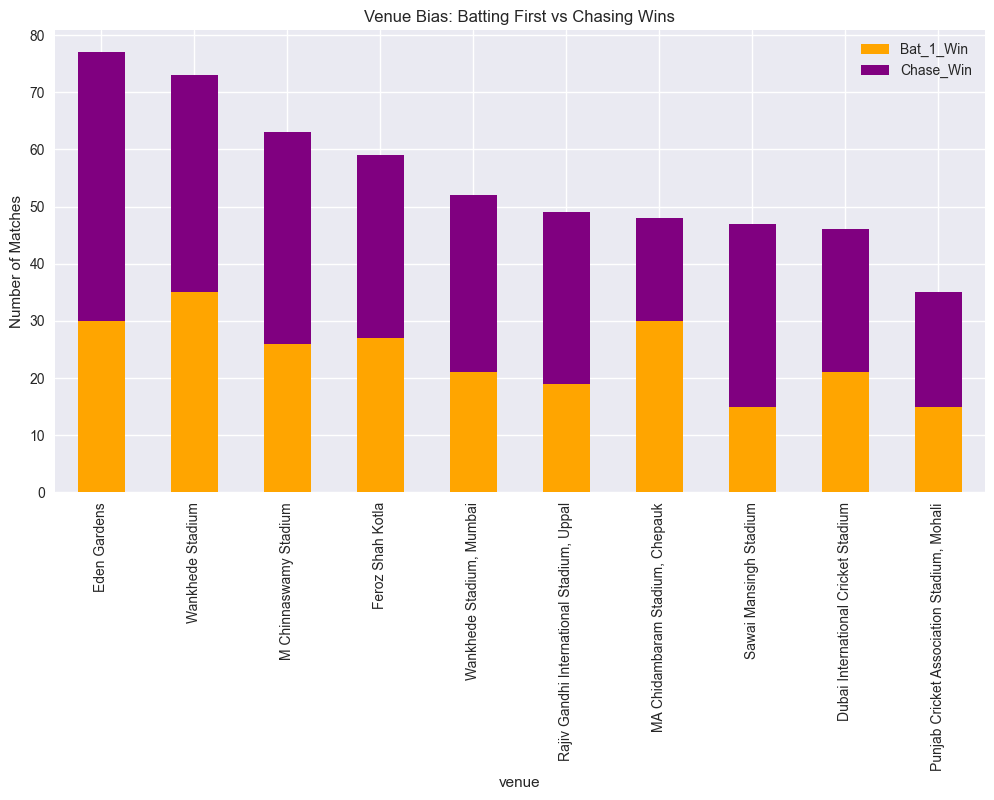

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

matches = pd.read_csv('matches.csv')

# 2. Ab Analysis Code run karo
venue_stats = matches.groupby('venue').apply(
    lambda x: pd.Series({
        'Matches': len(x),
        'Bat_1_Win': (x['match_won_by'] == x['first_to_bat']).sum(),
        'Chase_Win': (x['match_won_by'] != x['first_to_bat']).sum()
    })
).sort_values('Matches', ascending=False).head(10) # Top 10 Stadiums

print(venue_stats)

# 3. Plotting
plt.figure(figsize=(12,6))
venue_stats[['Bat_1_Win', 'Chase_Win']].plot(kind='bar', stacked=True, figsize=(12,6), color=['orange', 'purple'])
plt.title("Venue Bias: Batting First vs Chasing Wins")
plt.ylabel("Number of Matches")
plt.show()

Batsman Quadrant Analysis (Strike Rate vs Average)

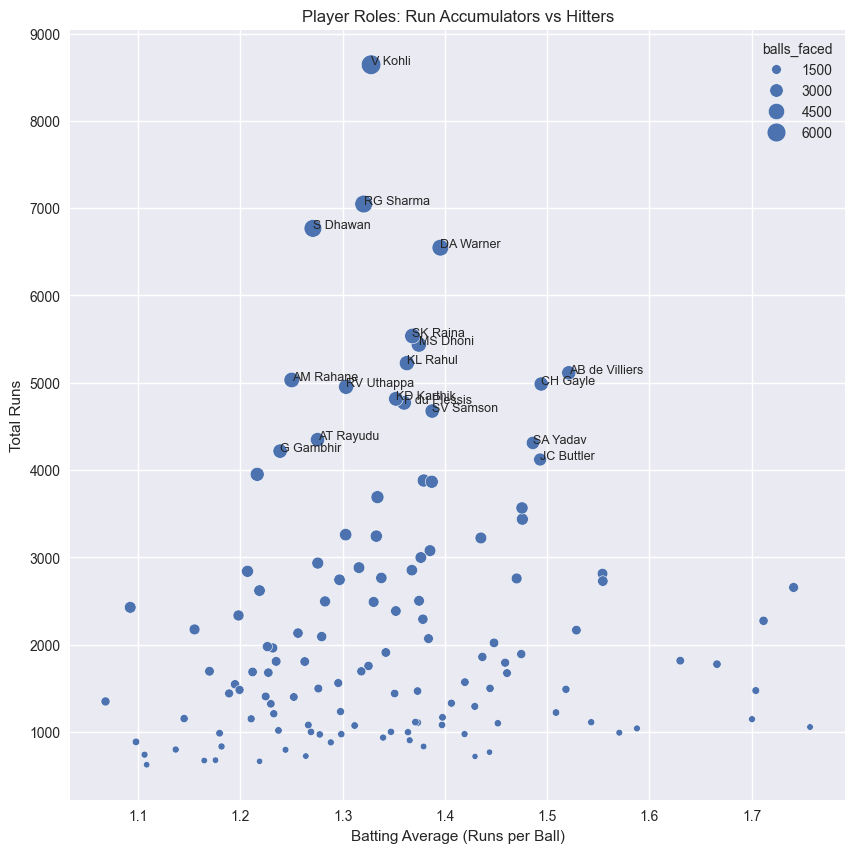

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
batters = pd.read_csv('batters.csv')

# Filter batters
mask = batters['balls_faced'] > 500
filtered_batters = batters[mask]

# Plot
plt.figure(figsize=(10,10))
sns.scatterplot(data=filtered_batters, x='batting_avg', y='runs_batter', size='balls_faced', sizes=(20, 200))

# Label famous players
for i in range(filtered_batters.shape[0]):
    if filtered_batters.iloc[i]['runs_batter'] > 4000: # Sirf top players ke naam
        plt.text(
            x=filtered_batters.iloc[i]['batting_avg'],  # Removed +0.5 to keep text closer to point
            y=filtered_batters.iloc[i]['runs_batter'],  # Removed +0.5 to keep text closer to point
            s=filtered_batters.iloc[i]['batter'],
            fontsize=9
        )

plt.title("Player Roles: Run Accumulators vs Hitters")
plt.xlabel("Batting Average (Runs per Ball)")
plt.ylabel("Total Runs")
plt.show()

Wicket Impact on Run Rate

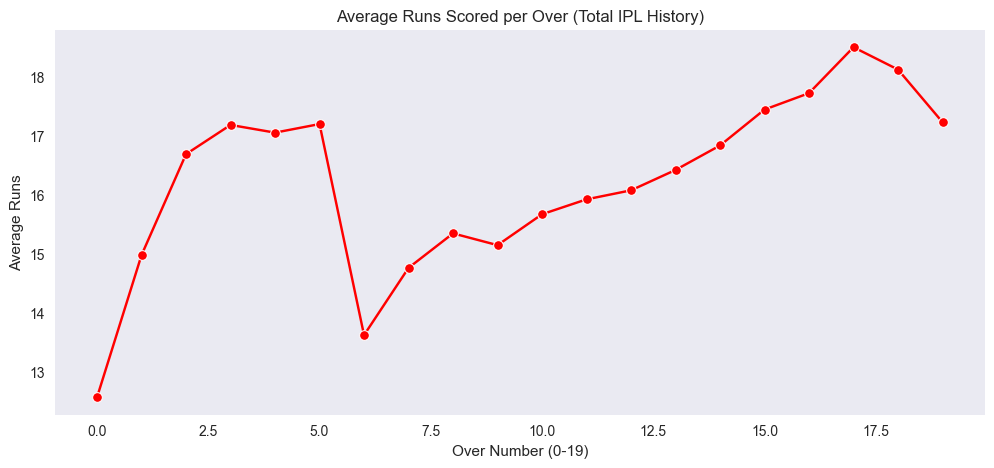

In [22]:

avg_runs_per_over = df.groupby('over')['runs_total'].sum() / df.groupby('over')['match_id'].nunique()

plt.figure(figsize=(12,5))
sns.lineplot(x=avg_runs_per_over.index, y=avg_runs_per_over.values, marker='o', color='red')
plt.title("Average Runs Scored per Over (Total IPL History)")
plt.xlabel("Over Number (0-19)")
plt.ylabel("Average Runs")
plt.grid()
plt.show()